# K-Nearest Neighbours 

It is important that I ensure my data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point

In [43]:
#import all modules including KNeighborsClassifier from sklearn.neighbors
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
import numpy as np
import os
from numpy import asarray, save, load
import matplotlib.pyplot as plt

In [44]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.01/")

#changes current working directory to the path given 
directory = os.chdir(path)

In [45]:
#load data 
load_data = np.load('all_train_data_0.01_with_2+.npy', allow_pickle=True)
df = pd.DataFrame(load_data)

# Create feature and target arrays
X = df.drop(101300, axis=1) 
y = df[101300].astype('int') #last column is the modified or not modified feature

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4 , random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8947368421052632


In [8]:
print("Test set predictions: {}".format(knn.predict(X_test)))
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions: [0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1]
Test set accuracy: 0.89


In [6]:
#fit classifier
knn.fit(X_train, y_train)

#predict using the X_test data
y_pred_rf = knn.predict(X_test)

#build dataframe to house the scores.
df = pd.DataFrame()

#name columns
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy']

#name required cells 
df.loc['Machine Learning Classification Method', 
       'Details'] = 'K Nearest Neighbours'

#fit classifier onto both datasets to compare 
df.loc['Train Accuracy', 'Details'] = knn.score(X_train, y_train) 
df.loc['Test Accuracy', 'Details'] = knn.score(X_test, y_test)
print(df)

                                                     Details
Machine Learning Classification Method  K Nearest Neighbours
Train Accuracy                                      0.925926
Test Accuracy                                       0.894737


Compared to the 1+ mass dataset, this extended data with 2+ masses seems to decrease the accuracy of both the training and test dataset using the same number of k neigbours. 

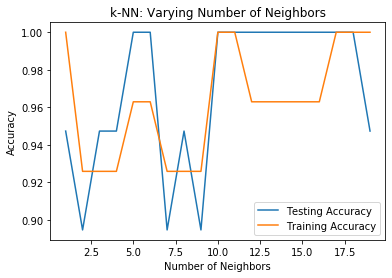

In [9]:
#overfitting and underfitting
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


As can be seen, we obtain a much more interesting graph which shows that the optimum number of neighbours for the normal 1+ dataset is not the same as the extended set. The optimum for this set seems to be 11 neighbours. 

In [12]:
# Create a k-NN classifier with different optimum 
knn = KNeighborsClassifier(n_neighbors=11)

In [11]:
#metrics for classification
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=11)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [36]:
#scaling and centering in pipline 
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=11))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.7894736842105263
Accuracy without Scaling: 1.0


Again, it seems that scaling has a greater effect when you combine both the 1+ and 2+ datasets. Thus, it will be removed for PCA.

PCA can now be done to reduce dimensionality of the dataset. It was found that 16 principal components was the minium number of components to meet the target of only 10% explained variance loss. 


In [15]:
from sklearn.decomposition import PCA

In [29]:
#build the pipeline
pipe = Pipeline([
        ('reducer', PCA(n_components=16)),
        ('classifier', KNeighborsClassifier())])

#fit the pipeline to the training datA
pipe.fit(X_train, y_train)

#score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

#prints the explained variance ratio and accuracy
print(pca.explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[8.56738154e-01 6.14412978e-02 4.01785212e-02 1.55090997e-02
 5.26947639e-03 4.21274163e-03 3.15446361e-03 2.22317054e-03
 1.55030585e-03 1.48905184e-03 1.36673421e-03 1.10169572e-03
 8.16588731e-04 7.83681711e-04 7.26846179e-04 5.64595541e-04
 4.50686044e-04 4.29266824e-04 3.75463527e-04 3.38890751e-04
 3.04524895e-04 2.77749536e-04 2.21759820e-04 2.09898620e-04
 1.55700931e-04 1.09633972e-04 1.68961809e-31]
100.0% test set accuracy


Similar to how we plotted testing and training accurracy of varying k nearest neighbours, we can see do the same for varying numbers of principal components to observe how accuracy behaves.

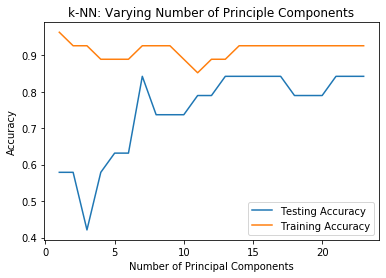

In [32]:
# Setup arrays to store train and test accuracies
n_components = np.arange(1, 24)
train_accuracy = np.empty(len(n_components))
test_accuracy = np.empty(len(n_components))

# Loop over different values of k
for i, k in enumerate(n_components):
    
    #setup a pipeline with a k-NN Classifier with k neighbors: knn
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=k)),
        ('classifier', KNeighborsClassifier())])

    #fit the pipeline to to the training data
    pipe.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = pipe.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = pipe.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Principle Components')
plt.plot(n_components, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_components, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

## PCA without Scaling 

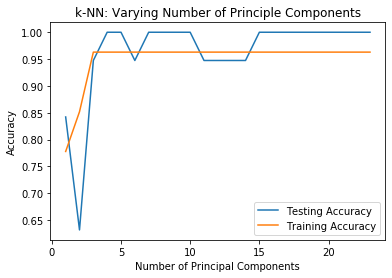

In [37]:
# Setup arrays to store train and test accuracies
n_components = np.arange(1, 24)
train_accuracy = np.empty(len(n_components))
test_accuracy = np.empty(len(n_components))

# Loop over different values of k
for i, k in enumerate(n_components):
    
    #setup a pipeline with a k-NN Classifier with k neighbors: knn
    pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', KNeighborsClassifier())])

    #fit the pipeline to to the training data
    pipe.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = pipe.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = pipe.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Principle Components')
plt.plot(n_components, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_components, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

## Hold-out Set
KNN (1+ & 2+ masses) lowest optimum number of PCs with Scaling: 7
KNN (1+ & 2+ masses) lowest optimum number of PCs without Scaling: 4

In [41]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/combined_hold_out/")

#changes current working directory to the path given 
directory = os.chdir(path)

#load data 
hold_out_data = np.load('combined_hold_out_test.npy', allow_pickle=True)
hold_out_df = pd.DataFrame(hold_out_data)

# Create feature and target arrays
X_hold_out = hold_out_df.drop(101300, axis=1) 
y_hold_out = hold_out_df[101300].astype('int') #last column is the modified or not modified feature

In [46]:
#create variables for number of each principal components
scaled_PC = 7
unscaled_PC = 4

#setup the pipeline with scaler
pipe_1 = Pipeline([('scaler', StandardScaler()),
                    ('reducer', PCA(scaled_PC)),
                    ('knn', KNeighborsClassifier(n_neighbors=7))])
        
#create second pipeline with no scaler
pipe_2 = Pipeline([('reducer', PCA(unscaled_PC)),
                    ('knn', KNeighborsClassifier(n_neighbors=7))])

#fit the pipeline to the whole data set; hold out set acts as test set 
knn_pca_scaled = pipe_1.fit(X, y)

#fit the seoncd pipeline to the whole data set. 
knn_pca_unscaled = pipe_2.fit(X, y)

# Compute and print metrics
print('Hold-out Set Accuracy with Scaling: {}'.format(knn_pca_scaled.score(X_hold_out, y_hold_out)))
print('Hold-out Set Accuracy without Scaling: {}'.format(knn_pca_unscaled.score(X_hold_out, y_hold_out)))

Hold-out Set Accuracy with Scaling: 0.5384615384615384
Hold-out Set Accuracy without Scaling: 1.0
